# 서울의 기온 데이터 분석하기

In [15]:
import csv
f = open("seoul.csv", "r", encoding = "cp949")
data = csv.reader(f, delimiter=",")
print(data)
f.close()

In [16]:
f = open("seoul.csv")
data = csv.reader(f)
header = next(data) #헤더를 제외한 데이터 한 행씩 출력하기
for row in data:
    print(row) #한줄씩 읽을게..
f.close()

['\t\t108', '서울', 'Oct-07', '13.9', '20.2', '25.4', '1907-10-05', '8.3', '3.3', '1907-10-24']
['\t\t108', '서울', 'Nov-07', '5.3', '10.2', '21.3', '1907-11-01', '0.6', '-8.9', '1907-11-30']
['\t\t108', '서울', 'Dec-07', '-3.9', '0.8', '9', '1907-12-13', '-8.7', '-20.1', '1907-12-23']
['\t\t108', '서울', 'Jan-08', '-3.5', '0.1', '6.2', '1908-01-31', '-7.5', '-14.3', '1908-01-22']
['\t\t108', '서울', 'Feb-08', '-4', '0.8', '8.4', '1908-02-27', '-8.8', '-15.8', '1908-02-07']
['\t\t108', '서울', 'Mar-08', '2.9', '8.1', '18.2', '1908-03-29', '-1.7', '-7.4', '1908-03-02']
['\t\t108', '서울', 'Apr-08', '10.1', '16.5', '22.9', '1908-04-20', '4.6', '-0.7', '1908-04-07']
['\t\t108', '서울', 'May-08', '14.9', '21.1', '25.2', '1908-05-25', '10', '5.2', '1908-05-04']
['\t\t108', '서울', 'Jun-08', '20.7', '26.8', '32.4', '1908-06-23', '16.3', '11.6', '1908-06-08']
['\t\t108', '서울', 'Jul-08', '23.5', '27.6', '32.9', '1908-07-24', '20.3', '14.7', '1908-07-06']
['\t\t108', '서울', 'Aug-08', '24.3', '29.2', '33.6', '1908

In [17]:
f = open("seoul.csv")
data = csv.reader(f)
header = next(data) #헤더를 제외한 데이터 한 행씩 출력하기
print(header)
f.close()

['\t\t지점번호', '지점명', '일시', '평균기온(℃)', '평균최고기온(℃)', '최고기온(℃)', '\t최고기온일자', '평균최저기온(℃)', '최저기온(℃)', '최저기온일자']


In [27]:
# 최고 기온이 가장 높았던 날을 찾기
f = open("seoul.csv")
data = csv.reader(f)
header = next(data)
max_temp = -999 #최고 기온을 저장할 변수 초기화
max_date = " " #최고 기온이었던 날짜를 저장할 변수를 초기화함
min_temp = 999
min_date = " "
for row in data:
    if row[5]=="": #데이터 누락
        row[5] = -999 #데이터 누락시에는 최고 기온을 -999로 지종함
    row[5] = float(row[5])
    if max_temp < row[5]:
        max_date = row[6]
        max_temp = row[5]
    if row[-2]=="":
        row[-2] = 999
    row[-2] = float(row[-2])
    if min_temp > row[-2]:
        min_date = row[-1]
        min_temp = row[-2]
f.close()
print("기상 관측 아래 서울의 최고 기온이 가장 높았던 날은 {0}이며 가장 높은 온도는 {1}입니다".format(max_date,max_temp ))
print("기상 관측 아래 서울의 최저 기온이 가장 낮았던 날은 {0}이며 가장 낮은 온도는 {1}입니다".format(min_date,min_temp ))

기상 관측 아래 서울의 최고 기온이 가장 높았던 날은 2018-08-01이며 가장 높은 온도는 39.6입니다
기상 관측 아래 서울의 최저 기온이 가장 낮았던 날은 1927-12-31이며 가장 낮은 온도는 -23.1입니다


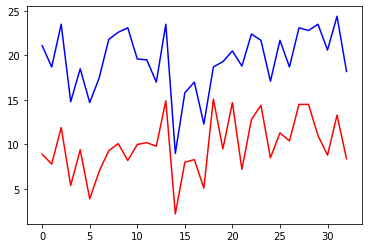

In [40]:
# 생일 기온 그래프 그리기

f = open("seoul1.csv")
data = csv.reader(f)
header = next(data)
result_min=[] #기온 넣기
result_max=[] 
for row in data:
    if row[2]!="":
        if row[2].split("-")[1] =="10" and  row[2].split("-")[2] =="22":
            row[-3] = float(row[-3])
            row[4] = float(row[4])
            result_min.append(row[-3])
            result_max.append(row[4])
            
f.close()

import matplotlib.pyplot as plt
plt.plot(result_min, "r")
plt.plot(result_max, "b")
plt.show()

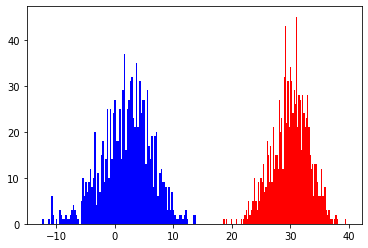

In [68]:
# 8월달의 최고기온 데이터 히스토그램으로 표현하기

f = open("seoul1.csv")
data = csv.reader(f)
header = next(data)
aug = [] # 8월의 최고 기온 값을 저장할 리스트 생성
octo=[]
for row in data:
    if row[2]!="":
        month = row[2].split("-")[1]
        if month =="08" :
            if row[4]!="":
                row[4] = float(row[4])
                aug.append(row[4])
        if month =="01" :
            if row[4]!="":
                row[4] = float(row[4])
                octo.append(row[4])
f.close()
plt.hist(aug, bins=100, color="r")
plt.hist(octo, bins=100, color="b")
plt.show()

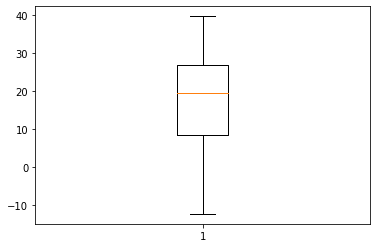

In [67]:
f = open("seoul1.csv")
data = csv.reader(f)
header = next(data)
result = [] # 8월의 최고 기온 값을 저장할 리스트 생성
for row in data:
    if row[4]!="":
        row[4] = float(row[4])
        result.append(row[4])
f.close()
plt.boxplot(result)
plt.show()

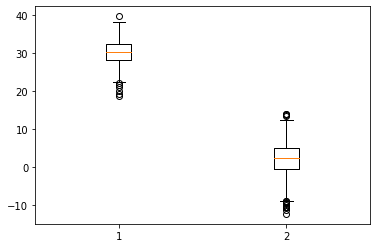

In [70]:
plt.boxplot([aug,octo])
plt.show()

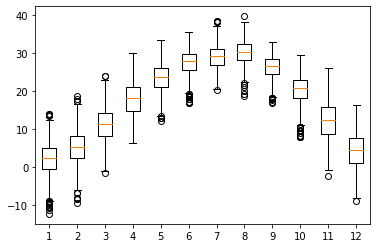

In [72]:
## 1월부터 12월까지의 최고기온으로 boxplot만들기
f = open("seoul1.csv")
data = csv.reader(f)
header = next(data)
month = [[],[],[],[],[],[],[],[],[],[],[],[]] #1월부터 12월꺼지의 boxplot용도를 리스트를 만들기
octo=[]
for row in data:
        if row[4]!="":
            row[4] = float(row[4])
            month[int(row[2].split("-")[1])-1].append(row[4])
f.close()
plt.boxplot(month)
plt.show()

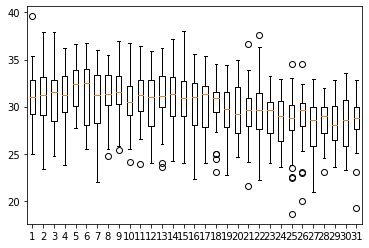

In [79]:
#8월1일부터 31일까지 최고 기온 데이터 상자 그림그리기

f = open("seoul1.csv")
data = csv.reader(f)
header = next(data)
day = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]] #1월부터 12월꺼지의 boxplot용도를 리스트를 만들기
octo=[]
for row in data:
    if row[2]!="":
        if row[2].split("-")[1]=="08":
            if row[4]!="":
                row[4] = float(row[4])
                day[int(row[2].split("-")[2])-1].append(row[4])
f.close()
plt.boxplot(day)
plt.show()

# 우리동네 인구 구조 시각화하기`

In [89]:
f = open("age1.csv")
data = csv.reader(f)

for row in data:
    if "홍제제3동" in row[0]:
        print(row)

['서울특별시 서대문구 홍제제3동(1141064000)', '15,433', '15,433', '61', '54', '71', '57', '81', '85', '82', '81', '67', '89', '84', '71', '77', '87', '109', '95', '115', '126', '130', '151', '197', '195', '193', '197', '221', '220', '210', '206', '209', '211', '217', '206', '217', '199', '184', '177', '173', '167', '199', '204', '181', '188', '189', '191', '157', '163', '198', '268', '258', '282', '279', '303', '298', '275', '281', '241', '248', '223', '277', '226', '270', '254', '252', '257', '262', '241', '243', '199', '194', '162', '144', '191', '176', '172', '181', '130', '152', '148', '162', '165', '122', '126', '152', '98', '85', '88', '73', '49', '37', '33', '19', '18', '10', '14', '13', '3', '4', '1', '3', '5', '24']


In [93]:
#우리동네 연령별 인수구 출력하기
f = open("age1.csv")
data = csv.reader(f)
result = []
for row in data:
    if "홍제제3동" in row[0]:
        for i in row[3:]:
            result.append(int(i)) #정수로 변환
print(result)

[61, 54, 71, 57, 81, 85, 82, 81, 67, 89, 84, 71, 77, 87, 109, 95, 115, 126, 130, 151, 197, 195, 193, 197, 221, 220, 210, 206, 209, 211, 217, 206, 217, 199, 184, 177, 173, 167, 199, 204, 181, 188, 189, 191, 157, 163, 198, 268, 258, 282, 279, 303, 298, 275, 281, 241, 248, 223, 277, 226, 270, 254, 252, 257, 262, 241, 243, 199, 194, 162, 144, 191, 176, 172, 181, 130, 152, 148, 162, 165, 122, 126, 152, 98, 85, 88, 73, 49, 37, 33, 19, 18, 10, 14, 13, 3, 4, 1, 3, 5, 24]


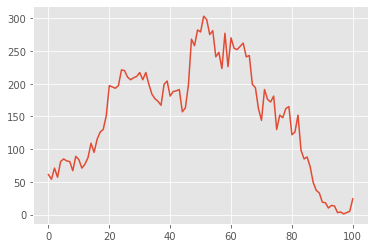

In [94]:
## 우리동네 연령별 인구수 데이터 시각화하기

plt.style.use("ggplot") #격자 무늬 스타일 지정
plt.plot(result)
plt.show()

지역명을 입력해주세요 : 홍제제3동


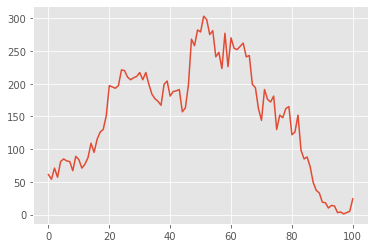

In [103]:
## 지역명을 입력받아 인구수 데이터 시각화하기
area=input("지역명을 입력해주세요 : ")
f = open("age1.csv")
data = csv.reader(f)
result = []
for row in data:
    if area in row[0]:
        for i in row[3:]:
            result.append(int(i)) #정수로 변환
plt.plot(result)
plt.show()

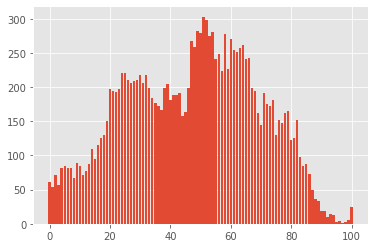

In [104]:
## 막대그래프를 시각화하기
plt.bar(range(101), result)
plt.show()

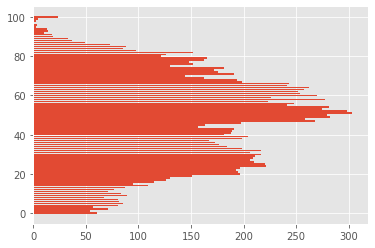

In [105]:
#수평막대그래프
plt.barh(range(101), result)
plt.show()

## 항아리 그래프 그리기

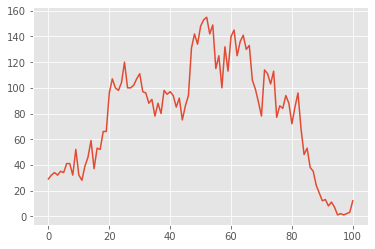

In [109]:
f = open("gender.csv")
data = csv.reader(f)
m=[]
f=[]
for row in data:
    if "홍제제3동" in row[0]:
        for i in range(0,101):
            m.append(int(row[i+3])) #정수로 변환
            f.append(int(row[-(i+1)]))
f.reverse() # 여성의 인구 거꾸로.
plt.plot(f)
plt.show()

In [111]:
#성별로 데이터 저장하기
f = open("gender.csv")
data = csv.reader(f)
m=[]
f=[]
for row in data:
    if "홍제제3동" in row[0]:
        for i in row[3:104]:
            m.append(int(i))
        for i in row[106:]:
            f.append(int(i))

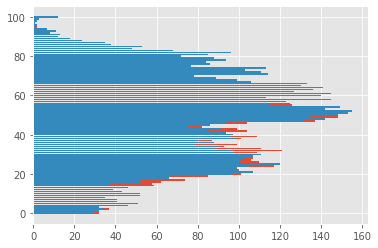

In [115]:
plt.barh(range(101), m)
plt.barh(range(101), f)
plt.show()

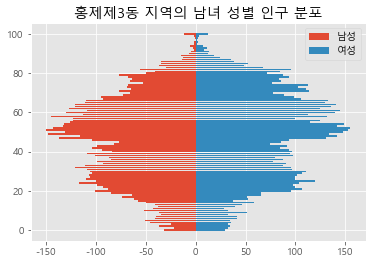

In [118]:
## 데이터를 남자 데이터를 음수로 넣어서.. 항아리 그래프 그리기
from matplotlib import font_manager, rc
path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)

f = open("gender.csv")
data = csv.reader(f)
m=[]
f=[]
for row in data:
    if "홍제제3동" in row[0]:
        for i in row[3:104]:
            m.append(-int(i)) #남성의 데이터를 음수로 바꾸어서 그래프로 표현함
        for i in row[106:]:
            f.append(int(i))
plt.rcParams["axes.unicode_minus"]=False #마이너스 넣기...(마이너스 부호 꺠짐해결)
plt.title("홍제제3동 지역의 남녀 성별 인구 분포")
plt.barh(range(101),m,label="남성")
plt.barh(range(101),f,label="여성")
plt.legend()
plt.show()

원하는 지역을 입력해주세요 : 제주특별자치도


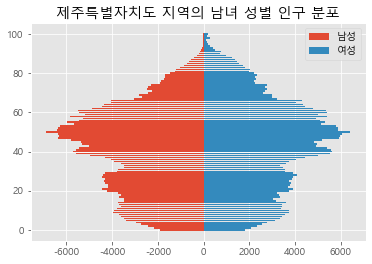

In [134]:
#찾고 싶은 지역을 입력해서..항아리 모영 그래프 그리기
area = input("원하는 지역을 입력해주세요 : ")
from matplotlib import font_manager, rc
path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)

f = open("gender.csv")
data = csv.reader(f)
m=[]
f=[]
for row in data:
    if area in row[0]:
        for i in row[3:104]:
            i=i.replace(",","")
            m.append(-int(i)) #남성의 데이터를 음수로 바꾸어서 그래프로 표현함
        for i in row[106:]:
            i=i.replace(",","")
            f.append(int(i))
        break
        
plt.rcParams["axes.unicode_minus"]=False #마이너스 넣기...(마이너스 부호 꺠짐해결)
plt.title("{0} 지역의 남녀 성별 인구 분포".format(area))
plt.barh(range(101),m,label="남성")
plt.barh(range(101),f,label="여성")
plt.legend()
plt.show()

## 우리동네 인구 구조를 파이 차트로 나타내기